# ÖDEV-1

**Yazar : Uğur Selim Özen**

In [2]:
#Gerekli kütüphaneler import edildi.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image

## SORU-1
**Pandas kütüphanesi ile bir DataFrame oluşturup içine Levels of measurementsları nominal , ordinal , interval ve ratio olan kolonlar ekleyelim.**

In [3]:
#Burada Cinsiyet-Nominal , Harf Notu-Ordinal , IQ-Interval , Yaş-Ratio olacak şekilde kolonlar ve verileri eklenerek dataframe oluşturuldu.

People= {'İsim'   : ['Emre','Mehmet','Emel','Leyla','Burak'] ,
         'Cinsiyet' : ['E','E','K','K','E'] ,
         'Harf Notu'  : ['A','B','D','A','C'] ,
         'IQ'     : [80,110,95,120,75] ,
         'Yaş'    : [21,19,23,20,25]
        }

df = pd.DataFrame(People)
df

,İsim,Cinsiyet,Harf Notu,IQ,Yaş
0,Emre,E,A,80,21
1,Mehmet,E,B,110,19
2,Emel,K,D,95,23
3,Leyla,K,A,120,20
4,Burak,E,C,75,25


## SORU-2
**Ekli verisetinde bulunan DataFrame'e ait radius_mean , area_mean ve compactness_mean kolonlarının count , mean , std , min , 25% , 50% , 75% , max değerlerini ve IQR metodu ile outlier durumda kalan veri sayılarını çıkartıp bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.**

In [4]:
data = pd.read_csv('data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
# Burada elimizdeki DataFrame kirli ve temiz olarak ikiye ayırmak için filtrelendi. 
Bening_data = data [data['diagnosis'] == 'B'] 
Malignant_data = data [data['diagnosis'] == 'M'] 

In [6]:
# Burada istenen kolonlar üzerinde çalışmak için DataFrame'e filtre uygulandı. 
selected_columns = ['radius_mean','area_mean','compactness_mean']
filtered_Bening_data = Bening_data[selected_columns]
filtered_Bening_data.head(10)

,radius_mean,area_mean,compactness_mean
19,13.540,566.3,0.08129
20,13.080,520.0,0.12700
21,9.504,273.9,0.06492
37,13.030,523.8,0.03766
46,8.196,201.9,0.05943
48,12.050,449.3,0.09092
49,13.490,561.0,0.07698
50,11.760,427.9,0.04966
51,13.640,571.8,0.06059
52,11.940,437.6,0.04751


In [7]:
# Burada istenen kolonların istatistik bilgileri elde edildi. 
Bening_statsinfo = filtered_Bening_data.describe()
Bening_statsinfo

,radius_mean,area_mean,compactness_mean
count,357.000000,357.000000,357.000000
mean,12.146524,462.790196,0.080085
std,1.780512,134.287118,0.033750
min,6.981000,143.500000,0.019380
25%,11.080000,378.200000,0.055620
50%,12.200000,458.400000,0.075290
75%,13.370000,551.100000,0.097550
max,17.850000,992.100000,0.223900


In [8]:
# Burada istenen kolonlar üzerinde çalışmak için DataFrame'e filtre uygulandı. 
filtered_Malignant_data = Malignant_data[selected_columns]
filtered_Malignant_data.head(10)

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280
5,12.45,477.1,0.17000
6,18.25,1040.0,0.10900
7,13.71,577.9,0.16450
8,13.00,519.8,0.19320
9,12.46,475.9,0.23960


In [9]:
# Burada istenen kolonların istatistik bilgileri elde edildi. 
Malignant_statsinfo = filtered_Malignant_data.describe()
Malignant_statsinfo

,radius_mean,area_mean,compactness_mean
count,212.000000,212.000000,212.000000
mean,17.462830,978.376415,0.145188
std,3.203971,367.937978,0.053987
min,10.950000,361.600000,0.046050
25%,15.075000,705.300000,0.109600
50%,17.325000,932.000000,0.132350
75%,19.590000,1203.750000,0.172400
max,28.110000,2501.000000,0.345400


<AxesSubplot:xlabel='compactness_mean', ylabel='Count'>

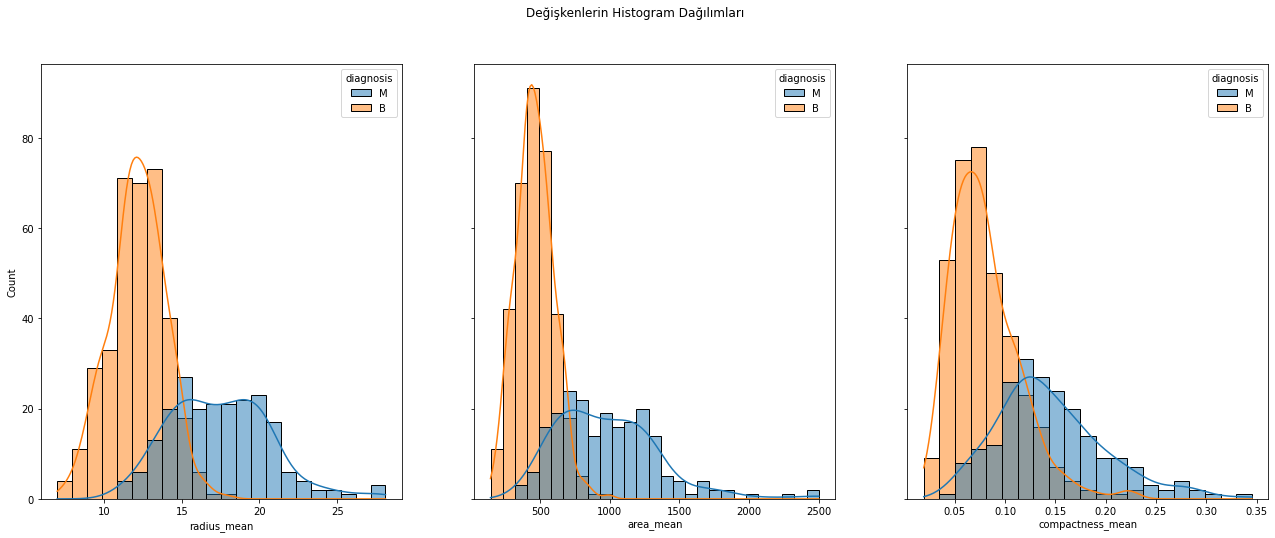

In [10]:
#İstenilen değişkenlere ait histogram dağılımları kde eğrileri çizildi.
fig,axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
fig.suptitle('Değişkenlerin Histogram Dağılımları')

sns.histplot(ax=axes[0], data=data , x='radius_mean' , kde = True , hue="diagnosis")
sns.histplot(ax=axes[1], data=data , x='area_mean' , kde = True , hue="diagnosis") 
sns.histplot(ax=axes[2], data=data , x='compactness_mean' , kde = True , hue="diagnosis")

In [11]:
#İstenilen değişkenlere ait istatistik değer tablosundan veriler filtrelenerek IQR metodu ile outlier noktalar ve alt-üst limitler analiz edildi.
def showstats(dataFrame_statsinfo,column_name):
    
    mean   = dataFrame_statsinfo[column_name][1]
    median = dataFrame_statsinfo[column_name][5]
    median_mean_ratio = median/mean
    Q1     = dataFrame_statsinfo[column_name][4]
    Q3     = dataFrame_statsinfo[column_name][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + str(column_name) + " değişkeninin ortalaması : " + str(mean) +
          '\n' + str(column_name) + " değişkeninin medyanı    : " + str(median) +
          '\n' + str(column_name) + " değişkeninin median/mean oranı    : " + str(median_mean_ratio) +
          '\n' + str(column_name) + " değişkeninin Q1 değeri    : " + str(Q1) +
          '\n' + str(column_name) + " değişkeninin Q3 değeri    : " + str(Q3) + 
          '\n' + str(column_name) + " değişkeninin IQR değeri    : " + str(IQR) + 
          '\n' + str(column_name) + " değişkeninin alt ve üst değer aralığı  : " + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [12]:
print('Kirli veri istatistik değerleri :')
for column_name in selected_columns :
    upper_band , lower_band = showstats(Malignant_statsinfo , column_name)
    outliers = filtered_Malignant_data[(filtered_Malignant_data[column_name] < lower_band) | (filtered_Malignant_data[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " değişkeninin " + str(len(outliers)) + " outlier noktası vardır : "   + str(outliers))


Kirli veri istatistik değerleri :


radius_mean değişkeninin ortalaması : 17.462830188679245
radius_mean değişkeninin medyanı    : 17.325000000000003
radius_mean değişkeninin median/mean oranı    : 0.9921072250494313
radius_mean değişkeninin Q1 değeri    : 15.075
radius_mean değişkeninin Q3 değeri    : 19.59
radius_mean değişkeninin IQR değeri    : 4.515000000000001
radius_mean değişkeninin alt ve üst değer aralığı  : (8.302499999999998, 26.3625)

radius_mean değişkeninin 3 outlier noktası vardır : [27.22 28.11 27.42]


area_mean değişkeninin ortalaması : 978.3764150943397
area_mean değişkeninin medyanı    : 932.0
area_mean değişkeninin median/mean oranı    : 0.9525985966353575
area_mean değişkeninin Q1 değeri    : 705.3
area_mean değişkeninin Q3 değeri    : 1203.75
area_mean değişkeninin IQR değeri    : 498.45000000000005
area_mean değişkeninin alt ve üst değer aralığı  : (-42.375000000000114, 1951.4250000000002)

area_mean değişkeninin 4 outlier noktası vardır : [2250. 2499. 2010. 25

In [13]:
print('Temiz veri istatistik değerleri :')
for column_name in selected_columns :
    upper_band , lower_band = showstats(Bening_statsinfo , column_name)
    outliers = filtered_Bening_data[(filtered_Bening_data[column_name] < lower_band) | (filtered_Bening_data[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " değişkeninin " + str(len(outliers)) + " outlier noktası vardır : "   + str(outliers))


Temiz veri istatistik değerleri :


radius_mean değişkeninin ortalaması : 12.146523809523808
radius_mean değişkeninin medyanı    : 12.2
radius_mean değişkeninin median/mean oranı    : 1.0044025921584463
radius_mean değişkeninin Q1 değeri    : 11.08
radius_mean değişkeninin Q3 değeri    : 13.37
radius_mean değişkeninin IQR değeri    : 2.289999999999999
radius_mean değişkeninin alt ve üst değer aralığı  : (7.645000000000001, 16.805)

radius_mean değişkeninin 3 outlier noktası vardır : [ 6.981 16.84  17.85 ]


area_mean değişkeninin ortalaması : 462.7901960784313
area_mean değişkeninin medyanı    : 458.4
area_mean değişkeninin median/mean oranı    : 0.990513636382895
area_mean değişkeninin Q1 değeri    : 378.2
area_mean değişkeninin Q3 değeri    : 551.1
area_mean değişkeninin IQR değeri    : 172.90000000000003
area_mean değişkeninin alt ve üst değer aralığı  : (118.84999999999997, 810.45)

area_mean değişkeninin 4 outlier noktası vardır : [880.2 838.1 992.1 819.8]


compactness_mean değiş

Text(0, 0.5, 'Malignant')

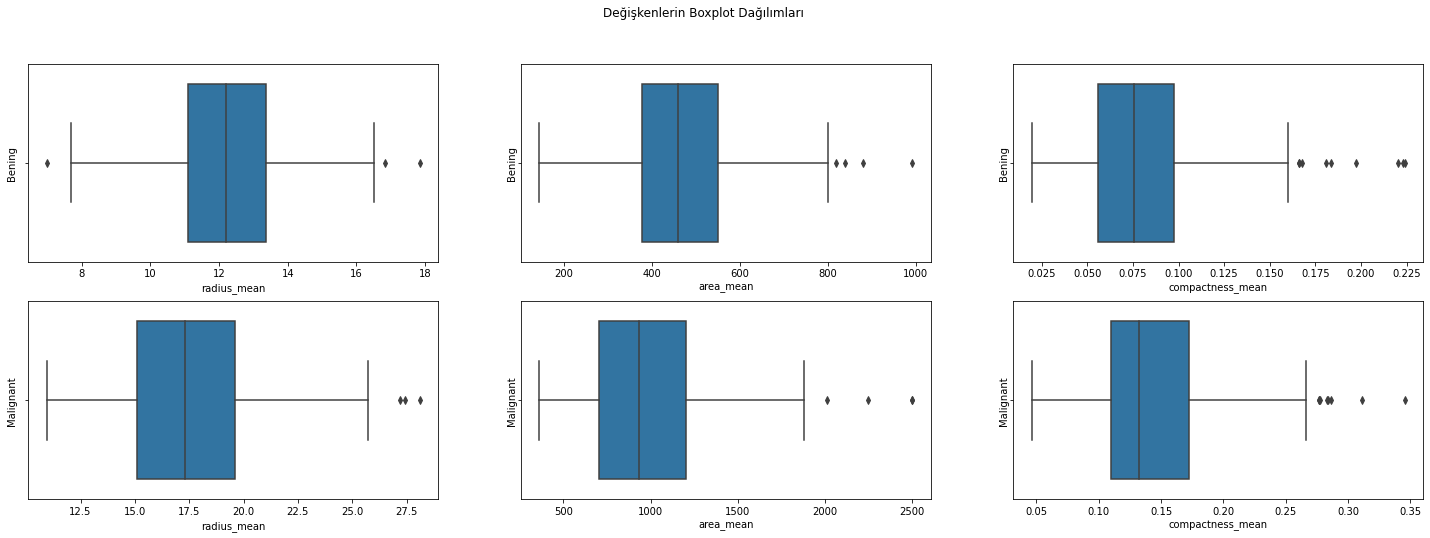

In [14]:
#İstenilen değişkenlere ait boxplot dağılımları çizildi.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Değişkenlerin Boxplot Dağılımları')

sns.boxplot(ax=axes[0,0], x='radius_mean' ,      data=filtered_Bening_data ).set_ylabel("Bening")
sns.boxplot(ax=axes[0,1], x='area_mean'   ,      data=filtered_Bening_data  ) .set_ylabel("Bening")
sns.boxplot(ax=axes[0,2], x='compactness_mean' , data=filtered_Bening_data ).set_ylabel("Bening")
sns.boxplot(ax=axes[1,0], x='radius_mean' ,      data=filtered_Malignant_data ).set_ylabel("Malignant")
sns.boxplot(ax=axes[1,1], x='area_mean'   ,      data=filtered_Malignant_data  ).set_ylabel("Malignant") 
sns.boxplot(ax=axes[1,2], x='compactness_mean' , data=filtered_Malignant_data ).set_ylabel("Malignant")

### Değerlendirme ve Yorumlar

Burada DataFrame'e ait radius_mean , area_mean ve compactness_mean kolonlarının histogram dağılımlarını incelediğimizde ;

◾Temiz veri için normal dağılıma **en çok radius_mean ve area_mean** verileri benzerken **en az compactness_mean** verileri benzemektedir.radius_mean ve area_mean değişkenlerinde mean ve median verileri yaklaşık %100 ve %99 luk bir oranla birbirine çok yakınken compactness_mean de bu oran %94 dür.Özetle bu üç değişken için istatistiksel verilere bakarken radius_mean ve area_mean değişkenlerinde mean değerinin compactness_mean değişkeninde ise median değerinin göz önüne alınması daha sağlıklı olacaktır.Bu dağılımları destekler şekilde **en çok compactness_mean** verilerinde outlier noktalar (9) tespit edilirken **en az radius_mean** verilerinde outlier noktalar (3) tespit edilmiştir.

◾Kirli veri için normal dağılıma **en çok radius_mean** verileri benzerken **en az compactness_mean** verileri benzemektedir.radius_mean değişkeninde mean ve median verileri yaklaşık %99 luk bir oranla birbirine çok yakınken area_mean de bu oran %95 compactness_mean de ise %91 dir.Özetle bu üç değişken için istatistiksel verilere bakarken radius_mean değişkeninde  mean değerinin compactness_mean ve area_mean değişkenlerinde ise median değerinin göz önüne alınması daha sağlıklı olacaktır.Bu dağılımları destekler şekilde **en çok compactness_mean** verilerinde outlier noktalar (8) tespit edilirken **en az radius_mean** verilerinde outlier noktalar (3) tespit edilmiştir. 

## SORU-3
**Ekli verisetinde bulunan DataFrame'e ait radius_mean , area_mean ve compactness_mean kolonlarının birbiriyle olan korelasyonlarını , kovaryanslarını , Pearson Correlation Coefficient larını , Spearman Rank Coefficient larını ve Effect Size larını bularak  sözel ve karşılaştırmalı olarak yorumlayalım.**

Text(0.5, 1.0, 'Compactness mean - Area mean')

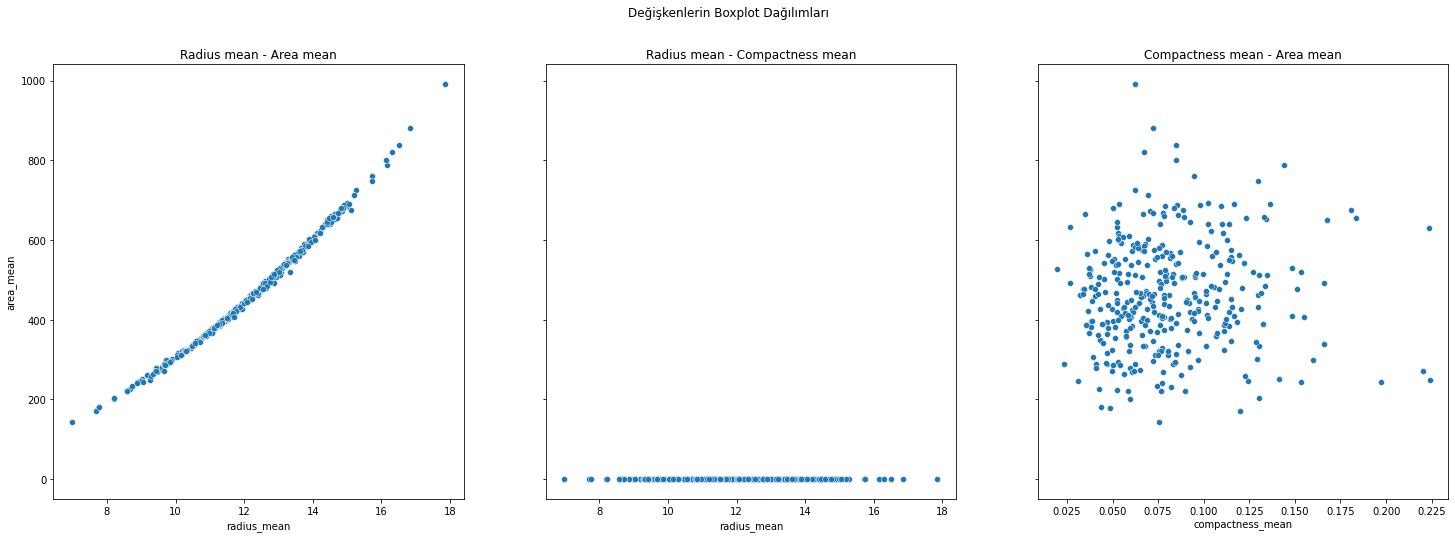

In [15]:
#Temiz veride istenilen değişkenlere ait temiz veri scatterplot grafikleri çizildi.
fig,axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Değişkenlerin Boxplot Dağılımları')
sns.scatterplot(ax=axes[0],data=filtered_Bening_data, x='radius_mean', y='area_mean'  ).set_title("Radius mean - Area mean")
sns.scatterplot(ax=axes[1],data=filtered_Bening_data, x='radius_mean', y='compactness_mean').set_title("Radius mean - Compactness mean")
sns.scatterplot(ax=axes[2],data=filtered_Bening_data, x='compactness_mean', y='area_mean').set_title("Compactness mean - Area mean")

In [16]:
# Temiz veride değişkenler arasındaki korrelasyon matrisi elde edildi.
filtered_Bening_data.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.994435,0.060442
area_mean,0.994435,1.000000,0.052353
compactness_mean,0.060442,0.052353,1.000000


In [17]:
#Temiz veride değişkenler arasındaki kovaryans değerleri elde edildi. 
cov1 = np.cov(filtered_Bening_data['radius_mean'],filtered_Bening_data['area_mean'])[0][1]
cov2 = np.cov(filtered_Bening_data['radius_mean'],filtered_Bening_data['compactness_mean'])[0][1]
cov3 = np.cov(filtered_Bening_data['compactness_mean'],filtered_Bening_data['area_mean'])[0][1]
print('radius_mean ile area_mean arasındaki kovaryans değeri : '+ str(cov1))
print('radius_mean ile compactness_mean arasındaki kovaryans değeri : ' + str(cov2))
print('compactness_mean ile area_mean arasındaki kovaryans değeri : ' + str(cov3))

radius_mean ile area_mean arasındaki kovaryans değeri : 237.76916020599245
radius_mean ile compactness_mean arasındaki kovaryans değeri : 0.003632111898073837
compactness_mean ile area_mean arasındaki kovaryans değeri : 0.23727332072042293


In [18]:
#Temiz veride değişkenler arasındaki pearson correlation coefficient değerleri elde edildi. 
pcorr_coef1 , _ = stats.pearsonr(filtered_Bening_data['radius_mean'],filtered_Bening_data['area_mean'])
pcorr_coef2 , _ = stats.pearsonr(filtered_Bening_data['radius_mean'],filtered_Bening_data['compactness_mean'])
pcorr_coef3 , _ = stats.pearsonr(filtered_Bening_data['compactness_mean'],filtered_Bening_data['area_mean'])
print('radius_mean ile area_mean arasındaki pearson correlation coefficient değeri : '+ str(pcorr_coef1))
print('radius_mean ile compactness_mean arasındaki pearson correlation coefficient değeri : ' + str(pcorr_coef2))
print('compactness_mean ile area_mean arasındaki pearson correlation coefficient değeri : ' + str(pcorr_coef3))

radius_mean ile area_mean arasındaki pearson correlation coefficient değeri : 0.994434885745703
radius_mean ile compactness_mean arasındaki pearson correlation coefficient değeri : 0.06044233146967565
compactness_mean ile area_mean arasındaki pearson correlation coefficient değeri : 0.05235297450321152


In [19]:
#Temiz veride değişkenler arasındaki spearman rank coefficient değerleri elde edildi.
spearman_rank_coeff1 = stats.spearmanr(filtered_Bening_data['radius_mean'],filtered_Bening_data['area_mean'])
spearman_rank_coeff2 = stats.spearmanr(filtered_Bening_data['radius_mean'],filtered_Bening_data['compactness_mean'])
spearman_rank_coeff3 = stats.spearmanr(filtered_Bening_data['compactness_mean'],filtered_Bening_data['area_mean'])
print('radius_mean ile area_mean arasındaki spearman rank coefficient değeri : '+ str(spearman_rank_coeff1))
print('radius_mean ile compactness_mean arasındaki spearman rank coefficient  değeri : ' + str(spearman_rank_coeff2))
print('compactness_mean ile area_mean arasındaki spearman rank coefficient  değeri : ' + str(spearman_rank_coeff3))

radius_mean ile area_mean arasındaki spearman rank coefficient değeri : SpearmanrResult(correlation=0.9992476692208752, pvalue=0.0)
radius_mean ile compactness_mean arasındaki spearman rank coefficient  değeri : SpearmanrResult(correlation=0.09994688849455513, pvalue=0.05922165200299108)
compactness_mean ile area_mean arasındaki spearman rank coefficient  değeri : SpearmanrResult(correlation=0.08266905266156524, pvalue=0.1189543363198116)


In [20]:
def effectsize (df1,df2) :
    mean_diff = df1.mean() - df2.mean()  
    n1 = len(df1)
    n2 = len(df2)
    dof = n1 + n2 - 2
    pooled_var = np.sqrt(((n1-1)*np.std(df1, ddof=1) ** 2 + (n2-1)*np.std(df2, ddof=1) ** 2) / dof)
    effect_size = mean_diff / pooled_var
    
    return effect_size

In [21]:
#Temiz veride değişkenler arasındaki effect size değerleri elde edildi.
effectsize1 = effectsize(filtered_Bening_data['area_mean'],filtered_Bening_data['radius_mean'])
effectsize2 = effectsize(filtered_Bening_data['radius_mean'],filtered_Bening_data['compactness_mean'])
effectsize3 = effectsize(filtered_Bening_data['area_mean'],filtered_Bening_data['compactness_mean'])
print('radius_mean ile area_mean arasındaki effect size değeri : '+ str(effectsize1))
print('radius_mean ile compactness_mean arasındaki effect size  değeri : ' + str(effectsize2))
print('compactness_mean ile area_mean arasındaki effect size  değeri : ' + str(effectsize3))

radius_mean ile area_mean arasındaki effect size değeri : 4.7454319505912474
radius_mean ile compactness_mean arasındaki effect size  değeri : 9.582333917076165
compactness_mean ile area_mean arasındaki effect size  değeri : 4.872923802607267


Text(0.5, 1.0, 'Compactness mean - Area mean')

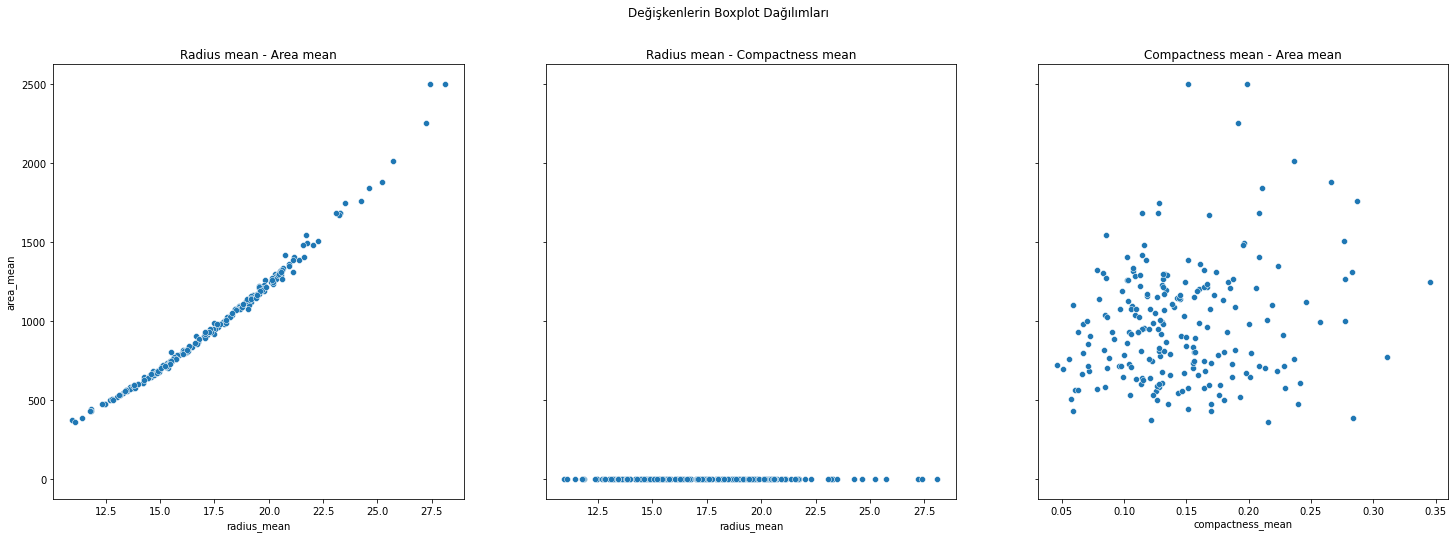

In [22]:
#Kirli veride istenilen değişkenlere ait kirli veri scatterplot grafikleri çizildi.
fig,axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Değişkenlerin Boxplot Dağılımları')
sns.scatterplot(ax=axes[0],data=filtered_Malignant_data, x='radius_mean', y='area_mean'  ).set_title("Radius mean - Area mean")
sns.scatterplot(ax=axes[1],data=filtered_Malignant_data, x='radius_mean', y='compactness_mean').set_title("Radius mean - Compactness mean")
sns.scatterplot(ax=axes[2],data=filtered_Malignant_data, x='compactness_mean', y='area_mean').set_title("Compactness mean - Area mean")

In [23]:
# Kirli veride değişkenler arasındaki korrelasyon matrisi elde edildi.
filtered_Malignant_data.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.990078,0.169168
area_mean,0.990078,1.000000,0.170181
compactness_mean,0.169168,0.170181,1.000000


In [24]:
#Kirli veride değişkenler arasındaki kovaryans değerleri elde edildi. 
cov1 = np.cov(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['area_mean'])[0][1]
cov2 = np.cov(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['compactness_mean'])[0][1]
cov3 = np.cov(filtered_Malignant_data['compactness_mean'],filtered_Malignant_data['area_mean'])[0][1]
print('radius_mean ile area_mean arasındaki kovaryans değeri : '+ str(cov1))
print('radius_mean ile compactness_mean arasındaki kovaryans değeri : ' + str(cov2))
print('compactness_mean ile area_mean arasındaki kovaryans değeri : ' + str(cov3)) 

radius_mean ile area_mean arasındaki kovaryans değeri : 1167.16650308504
radius_mean ile compactness_mean arasındaki kovaryans değeri : 0.029261743271036405
compactness_mean ile area_mean arasındaki kovaryans değeri : 3.3804811038630063


In [25]:
#Kirli veride değişkenler arasındaki pearson correlation coefficient değerleri elde edildi. 
pcorr_coef1 , _ = stats.pearsonr(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['area_mean'])
pcorr_coef2 , _ = stats.pearsonr(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['compactness_mean'])
pcorr_coef3 , _ = stats.pearsonr(filtered_Malignant_data['compactness_mean'],filtered_Malignant_data['area_mean'])
print('radius_mean ile area_mean arasındaki pearson correlation coefficient değeri : '+ str(pcorr_coef1))
print('radius_mean ile compactness_mean arasındaki pearson correlation coefficient değeri : ' + str(pcorr_coef2))
print('compactness_mean ile area_mean arasındaki pearson correlation coefficient değeri : ' + str(pcorr_coef3))

radius_mean ile area_mean arasındaki pearson correlation coefficient değeri : 0.9900784505519766
radius_mean ile compactness_mean arasındaki pearson correlation coefficient değeri : 0.16916808312339426
compactness_mean ile area_mean arasındaki pearson correlation coefficient değeri : 0.1701808617641893


In [26]:
#Kirli veride değişkenler arasındaki spearman rank coefficient değerleri elde edildi.
spearman_rank_coeff1 = stats.spearmanr(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['area_mean'])
spearman_rank_coeff2 = stats.spearmanr(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['compactness_mean'])
spearman_rank_coeff3 = stats.spearmanr(filtered_Malignant_data['compactness_mean'],filtered_Malignant_data['area_mean'])
print('radius_mean ile area_mean arasındaki spearman rank coefficient değeri : '+ str(spearman_rank_coeff1))
print('radius_mean ile compactness_mean arasındaki spearman rank coefficient  değeri : ' + str(spearman_rank_coeff2))
print('compactness_mean ile area_mean arasındaki spearman rank coefficient  değeri : ' + str(spearman_rank_coeff3))

radius_mean ile area_mean arasındaki spearman rank coefficient değeri : SpearmanrResult(correlation=0.9987880780186276, pvalue=1.2195045896520177e-276)
radius_mean ile compactness_mean arasındaki spearman rank coefficient  değeri : SpearmanrResult(correlation=0.11426516697758679, pvalue=0.09704957432256152)
compactness_mean ile area_mean arasındaki spearman rank coefficient  değeri : SpearmanrResult(correlation=0.10114746515775117, pvalue=0.14216153582997212)


In [27]:
#Kirli veride değişkenler arasındaki effect size değerleri elde edildi.
effectsize1 = effectsize(filtered_Malignant_data['area_mean'],filtered_Malignant_data['radius_mean'])
effectsize2 = effectsize(filtered_Malignant_data['radius_mean'],filtered_Malignant_data['compactness_mean'])
effectsize3 = effectsize(filtered_Malignant_data['area_mean'],filtered_Malignant_data['compactness_mean'])
print('radius_mean ile area_mean arasındaki effect size değeri : '+ str(effectsize1))
print('radius_mean ile compactness_mean arasındaki effect size  değeri : ' + str(effectsize2))
print('compactness_mean ile area_mean arasındaki effect size  değeri : ' + str(effectsize3))

radius_mean ile area_mean arasındaki effect size değeri : 3.693246109763467
radius_mean ile compactness_mean arasındaki effect size  değeri : 7.6428182098023605
compactness_mean ile area_mean arasındaki effect size  değeri : 3.7599485187883586


### Değerlendirme ve Yorumlar

Burada DataFrame'e ait radius_mean , area_mean ve compactness_mean kolonlarının arasında yapılan farklı istatistik testlerini , grafikleri , matrisleri incelediğimizde ;

◾Temiz veride , scatter plot grafiğinde açıkça görülen **radius_mean ve area_mean** arasında görülen **pozitif ve güçlü korelasyon** ilişkisini **(yaklaşık olarak %99.2)** , korelasyon matrisi , kovaryans değeri **(pozitif ve çok yüksek -> 237)** , p değeri **(p = 0)** , spearman rank katsayı değeri de istatistiksel olarak desteklemektedir.Öte yandan yine scatter plot grafiğinden **radius_mean ve compactness_mean** veya **compactness_mean ve area_mean** değerleri arasında **pozitif veya negatif korelasyon olmadığını** korelasyon matrisi **(yaklaşık olarak %9)** , kovaryans değeri **(cov=0)** , p değeri **(p > 0.05)** , spearman rank katsayı değeri de istatistiksel olarak desteklemektedir. 

◾Kirli veride , scatter plot grafiğinde açıkça görülen **radius_mean ve area_mean** arasında görülen **pozitif ve güçlü korelasyon** ilişkisini **(yaklaşık olarak %99.8)** , korelasyon matrisi , kovaryans değeri **(pozitif ve çok yüksek -> 1167)** , p değeri **(p = 0)** , spearman rank katsayı değeri de istatistiksel olarak desteklemektedir.Öte yandan yine scatter plot grafiğinden **radius_mean ve compactness_mean** veya **compactness_mean ve area_mean** değerleri arasında **pozitif veya negatif korelasyon olmadığını** korelasyon matrisi **(yaklaşık olarak %10)** , kovaryans değeri **(cov=0)** , p değeri **(p >= 0.1)** , spearman rank katsayı değeri de istatistiksel olarak desteklemektedir. 

## SORU-4
**Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.**

Öncelikle Bayes teoreminin temel olarak mantığının ne olduğundan bahsedersek ;

 Bir olay gerçekleşirken farklı sebepler aynı sonucu doğurabilir.Bu aşamada hangi olasılık ile hangi sebebin bu sonuca neden olduğunu bulmada Bayes teoremi bize fayda sağlamaktadır.Konuyu netleştirmek ve somutlaştırmak açısından Bayes Teoremi ile ilgili 5 gerçek hayat örneği verecek olursak ;

◾ Ev tozu ve polen için bir bireyin alerji testi yaptırdığını varsayalım ancak yapılan testin sonucu her zaman doğru değil.Gerçekten **alerjisi olan kişiler için testin Pozitif çıkma sonucu  %90 oranında** iken aslında **alerjisi olmayan bireyler için Pozitif çıkma sonucu %5 oranındadır.** Bireyin bulunduğu popülasyonun %3'ünde alerji var ve test sonucu birey için **Pozitif** çıkıyorsa , o kişinin gerçekten alerji olma ihtimali nedir sorusu Bayes Teoremi problemine örnektir.

◾ Bir market sahibinin aylık düzenli olarak iki farklı tedarikçiden yumurta aldığını düşünelim.Uzun bir süre bunların gerekli kaydını tuttukdan sonra şu gözlemi yapmıştır ; **Aylık A marka 900 , B marka 1100 yumurta gelmekte , toplam yumurtaların ortalama %7'si kırık çıkmaktadır.** Buradaki durumda aylık tedarik ile gelen A marka yumurtanın kırık olma ihtimal nedir sorusu Bayes Teoremi problemine örnektir.

◾ Seri üretim yapan bir fabrikada , iki farklı üretim bandında görüntü işleme yöntemi ile gelen ürünleri sayan robot kollar çalışmaktadır.Bu iki farklı bantta çalışan robot kollar sistemlerinde ürün sayımı yapmak için X ve Y marka iki farklı sensör kullanmaktadır.Belirli bir süre sensör verileri tutulduktan sonra şu gözlem yapılmıştır ; **Sensörlerin donanım gücündeki farkından dolayı günlük X marka sensör bandında 2500 , Y marka sensör bandında 2000 ürün sayılmakta , toplam ürün sayısı hergün kontrol edildiğinde sensörlerin toleransından dolayı ortalama olarak %3 eksik sayıldığı tespit edilmiştir.** İş geliştirme için yapılan bir toplantıda gelen bugün bantdan geçerken eksik sayılan bir ürünün Y marka sensörün bulunduğu banda ait olma ihtimali nedir sorusu Bayes Teoremi problemine örnektir.

◾ Popülasyonda **10000 de 8 sıklıkla** görülen bir kanser çeşidi için geliştirilen bir **tanı kiti %98 başarı oranına %2 hata oranına** sahiptir.Toplamda **1000 kişi** üzerinde bu tanı kiti ile test yapıldığında kişinin test sonucunun **Pozitif** olduğu söyleniyorsa kişinin gerçekten kanser olma ihtimali nedir sorusu Bayes Teoremi problemine örnektir.

◾ Makine Öğrenmesi ve yapay zeka üzerine Ar-Ge projeleri geliştiren bir start-up firmasında uzun dönemli bir görüntü işleme-nesne tespiti projesine başlanmıştır.Bu projede tarım arazileri ve seralarda **olgun domatesleri toplayacak görüntü işleme tabanlı otonom çalışacak robot kollar için yazılım geliştirilecektir.** Burada görüntü işleme kısmında şu problem ile karşılaşılmıştır ; olgun domatesler fiziksel görüntü olarak **kırmızı , sert ve katı** iken aynı boytlarda bir **top** da çok benzer dış görünüşe sahiptir.Burada gelecek **kırmızı , katı ve sert olan nesnenin olgun bir domates olma ihtimali nedir** sorusu Bayes Teoremi problemine örnektir. 


## SORU-5
**Poisson , Normal , Gamma , Weibull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.**

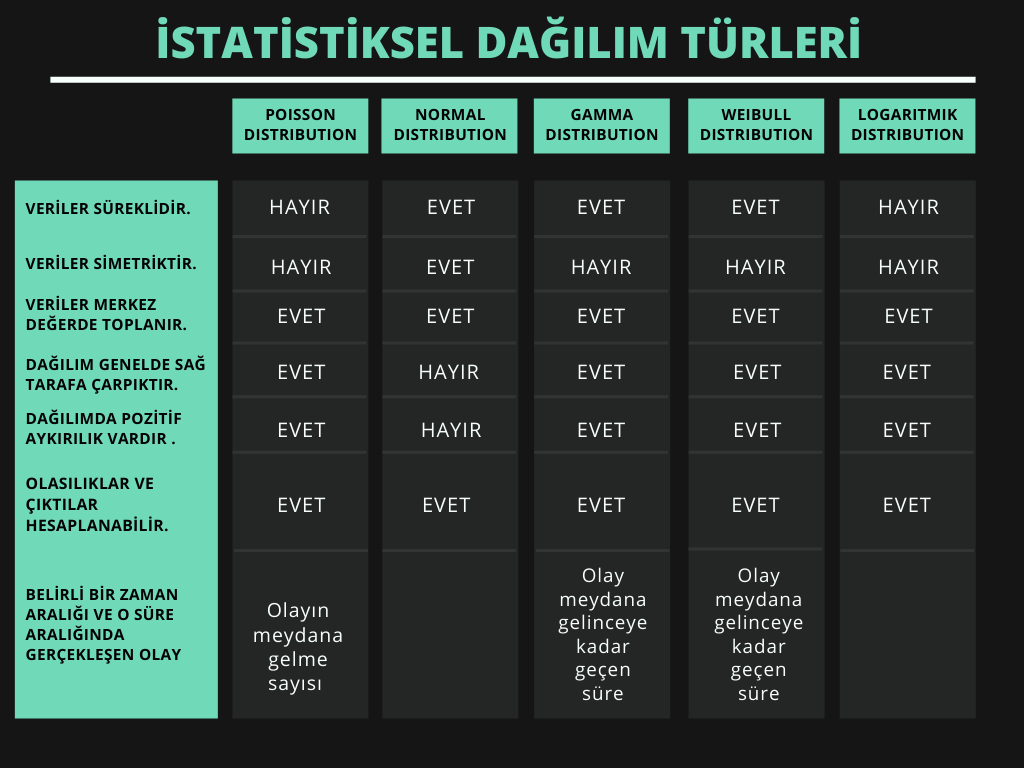